# **Case Study on Regression**

The given dataset contains price of second-hand Hyundai grand i10 car with
respect to year of making. Find the best linear relationship between year and
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


### Understanding the dataset

In [4]:
print(data.info())
print(data.isnull().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB
None
Year     0
Price    0
dtype: int64
              Year          Price
count   112.000000     112.000000
mean   2016.669643  483866.044643
std       1.629616   91217.450533
min    2013.000000  300000.000000
25%    2015.000000  423750.000000
50%    2017.000000  500000.000000
75%    2017.000000  550000.000000
max    2020.000000  755000.000000


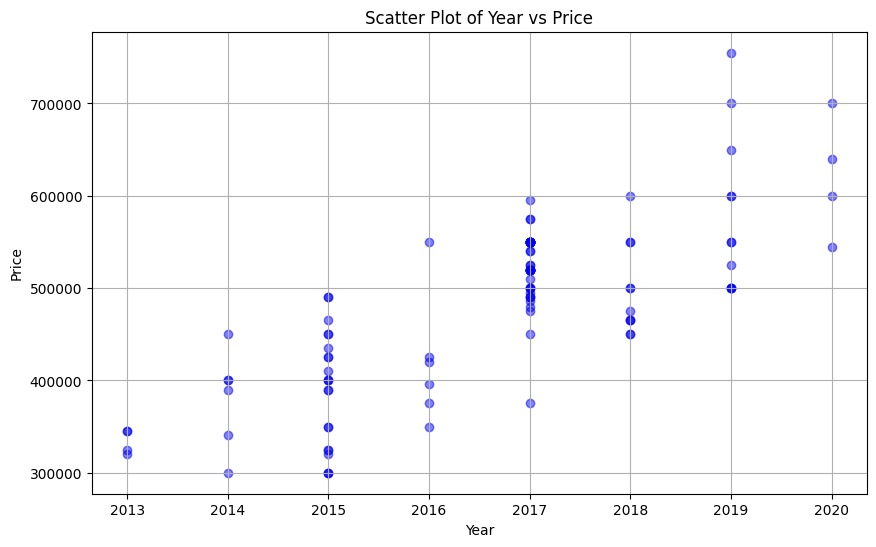

In [6]:
# Scatter plot of Year vs Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Year'], data['Price'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

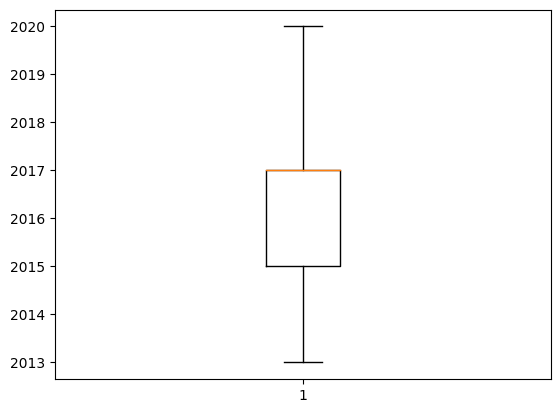

In [9]:
# Visualizing outliers using a box plot
plt.boxplot(data['Year'])
plt.show()

# No outliers found

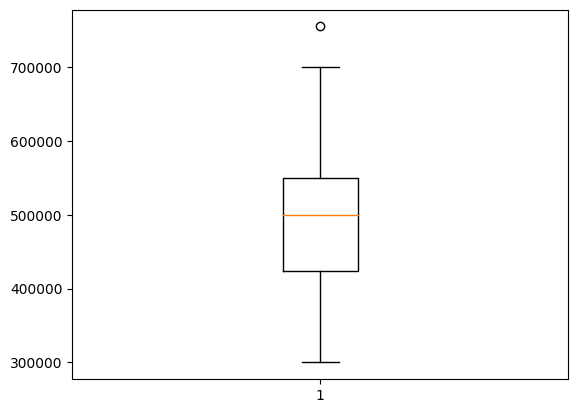

In [11]:
plt.boxplot(data['Price'])
plt.show()

# With outliers

Checking correlation

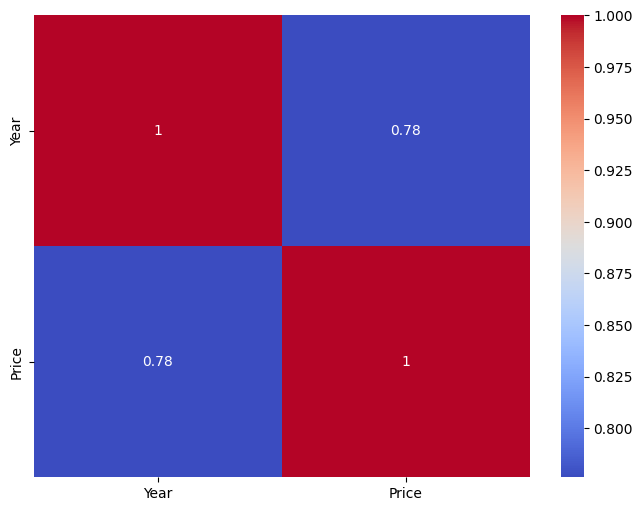

In [14]:
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

There is high correlation between Year and Price

### Regression Models

Linear Regression

In [15]:
# identifying the target variable (y) and independent variable (x)
y = data['Price']
x= data.drop(['Price'],axis = 1)

In [19]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size = .25)

In [20]:
# Linear Regression
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
linear_prediction = model.predict(x_test)
linear_prediction

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [21]:
from sklearn.metrics import mean_squared_error
print('MSE is :' ,mean_squared_error(y_test, linear_prediction))

MSE is : 3878767151.073449


In [22]:
from sklearn.metrics import r2_score
print('R2 score is :' , r2_score(y_test, linear_prediction))

R2 score is : 0.4347961632108023


### Lasso Regression

In [23]:
# Lasso Regression

from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=.1)
lasso_model.fit(x_train, y_train)
lasso_prediction = lasso_model.predict(x_test)
lasso_prediction

array([599222.97656578, 505265.02551627, 552244.00104102, 552244.00104102,
       552244.00104102, 411307.07446676, 505265.02551627, 552244.00104102,
       599222.97656578, 599222.97656578, 317349.12341726, 505265.02551627,
       411307.07446676, 646201.95209053, 552244.00104102, 599222.97656578,
       317349.12341726, 411307.07446676, 505265.02551627, 505265.02551627,
       505265.02551627, 505265.02551627, 505265.02551627, 505265.02551627,
       505265.02551627, 505265.02551627, 411307.07446676, 411307.07446676])

In [24]:
print('MSE is : ',mean_squared_error(y_test,lasso_prediction))

MSE is :  3878764025.5442586


In [25]:
print('R2 score is : ', r2_score(y_test,lasso_prediction))

R2 score is :  0.43479661865476726


In [26]:
# Predicting the possible price of a 2022 model second-hand grand i10

# predictions using the linear regression model
predicted_price_linear = model.predict([[2022]])

# predictions using the lasso regression model
predicted_price_lasso = lasso_model.predict([[2022]])

print("Predicted Price for a 2022 model using Linear Regression:",predicted_price_linear[0])
print("Predicted Price for a 2022 model using Lasso Regression:",predicted_price_lasso[0])

Predicted Price for a 2022 model using Linear Regression: 740160.1193776578
Predicted Price for a 2022 model using Lasso Regression: 740159.9031400383


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


It appears are both models produce almost similar predictions with only slight variations. But considering the MSE and R score, we can see that lasso model is giving slightly less error compared to the Linear model. And hence we can conclude that the Lasso Regression Model is performing slightly better.